In [97]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from icecream import ic
import numpy as np

1. Import data les données du csv

In [98]:
df = pd.read_csv('carData.csv')

2. Exploration des données

In [99]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [100]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [102]:
df['Selling_Price'] = df['Selling_Price'] * 1000
df['Present_Price'] = df['Present_Price'] * 1000
df['Seller_Type'] = df['Seller_Type'].replace({'Dealer': 0, 'Individual': 1})
df['Fuel_Type'] = df['Fuel_Type'].replace({'Petrol': 0, 'Diesel': 1, 'CNG': 2})
df['Transmission'] = df['Transmission'].replace({'Manual': 0, 'Automatic': 1})

C:\Users\inesl\AppData\Local\Temp\ipykernel_10248\3624401349.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Seller_Type'] = df['Seller_Type'].replace({'Dealer': 0, 'Individual': 1})
C:\Users\inesl\AppData\Local\Temp\ipykernel_10248\3624401349.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Fuel_Type'] = df['Fuel_Type'].replace({'Petrol': 0, 'Diesel': 1, 'CNG': 2})
C:\Users\inesl\AppData\Local\Temp\ipykernel_10248\3624401349.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in

2. Variable Continue 

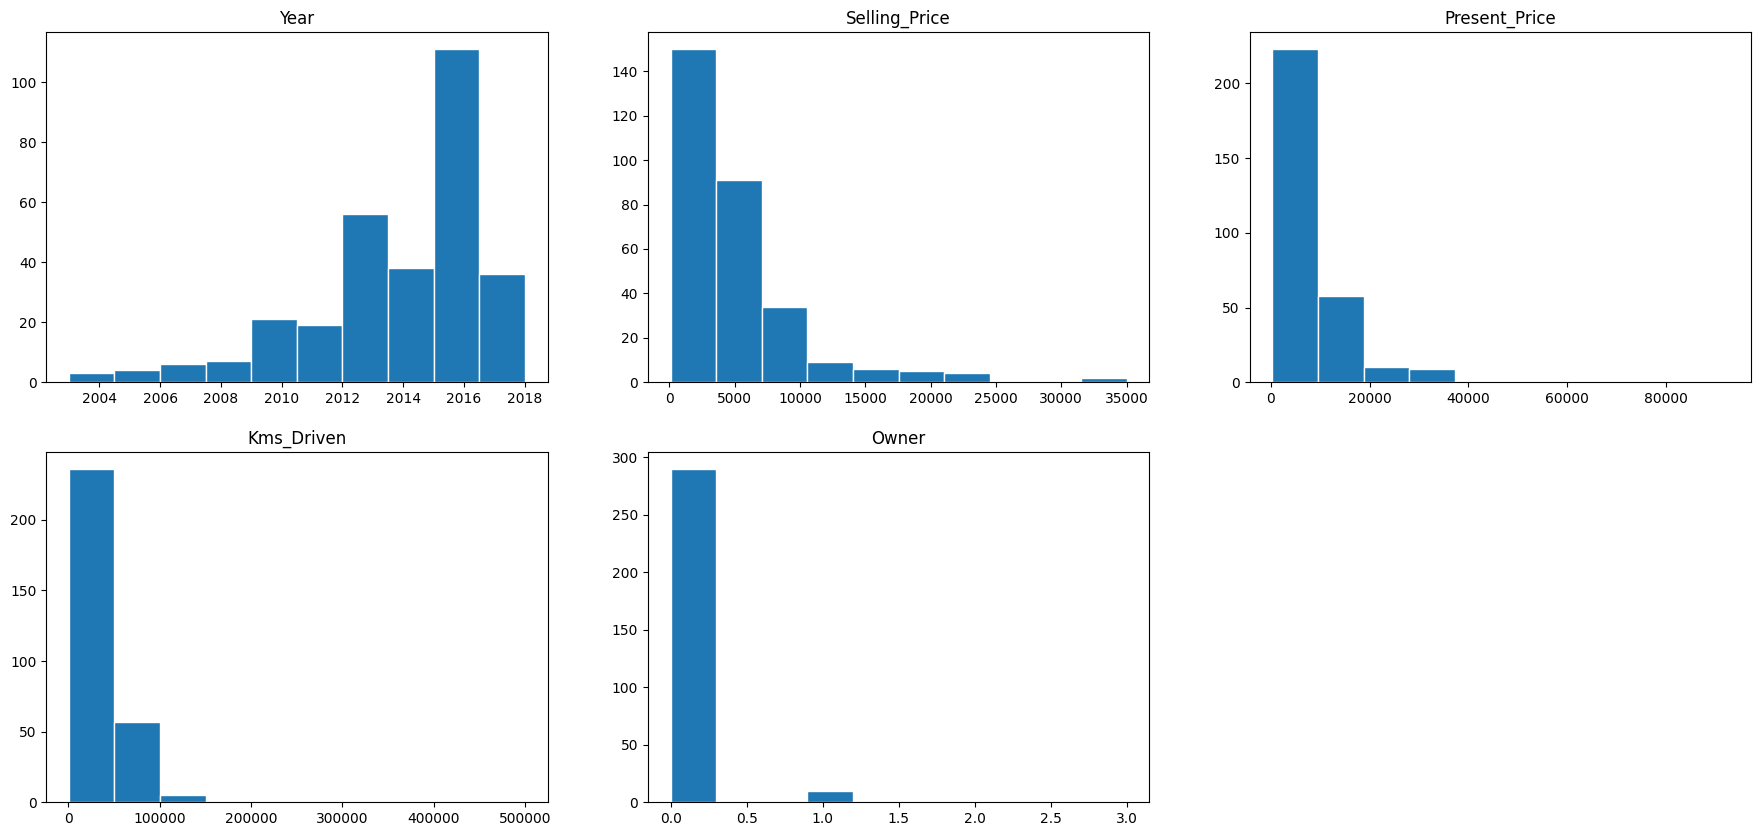

In [103]:
plt.figure(figsize=(22, 10))

cols = ['Year', 'Selling_Price','Present_Price','Kms_Driven','Owner']
for i, col in enumerate(cols, 1):
    plt.subplot(2, 3, i)  
    plt.hist(df[col], bins=10, edgecolor='white')
    plt.title(col)
plt.show()

2. Variable Discréte

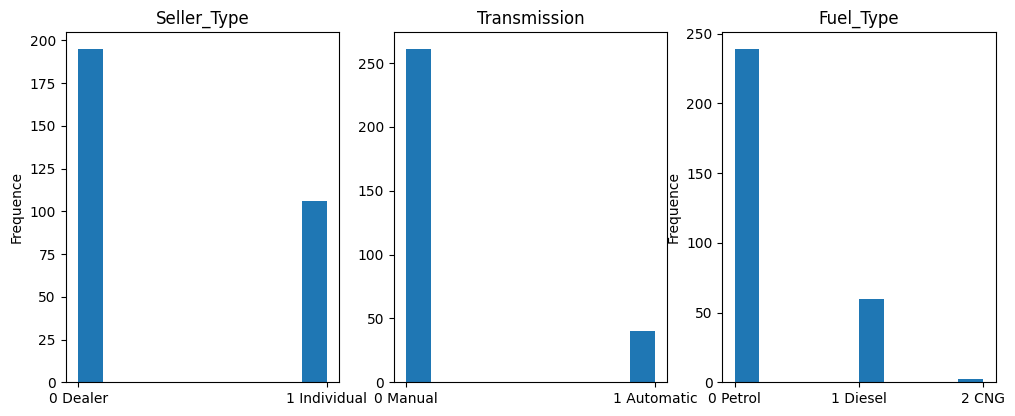

In [104]:
plt.figure(figsize=(12, 10))
plt.subplot(2,3,1)
plt.hist(df['Seller_Type'])
plt.xticks([0, 1], ['0 Dealer', '1 Individual'])
plt.title('Seller_Type')
plt.ylabel('Frequence')
plt.subplot(2,3,2)
plt.hist(df['Transmission'])
plt.xticks([0, 1], ['0 Manual', '1 Automatic'])
plt.title('Transmission')
plt.subplot(2,3,3)
plt.hist(df['Fuel_Type'])
plt.xticks([0, 1, 2], ['0 Petrol', '1 Diesel','2 CNG'])
plt.title('Fuel_Type')
plt.ylabel('Frequence')
plt.show()

6

(301, 1) (301,)


Text(0.5, 0, 'KMS driven')

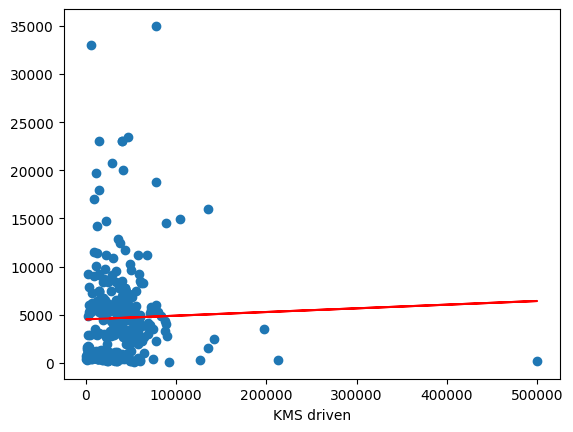

In [105]:
X = df['Kms_Driven'].values.reshape(-1,1)
y = df['Selling_Price'].values
print(X.shape, y.shape)

# print(X[:,0].reshape(-1,1).shape)

model = LinearRegression()
model.fit(X,y)
model.score(X,y)

predict2 = model.predict(X)

plt.scatter(X, y)
plt.plot(X, predict2, color='r')
plt.xlabel("KMS driven")

(301, 1) (301,)


Text(0.5, 0, 'KMS driven')

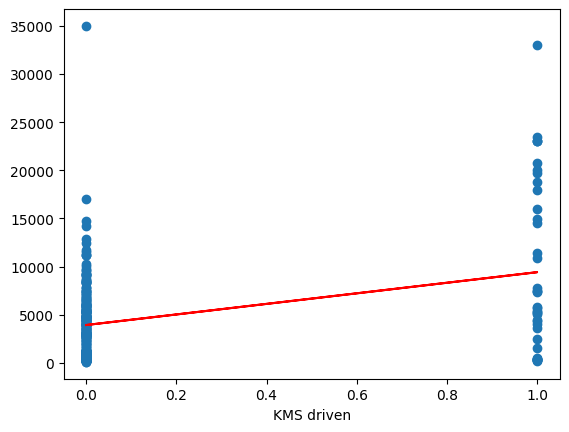

In [106]:
X = df['Transmission'].values.reshape(-1,1)
y = df['Selling_Price'].values
print(X.shape, y.shape)

# print(X[:,0].reshape(-1,1).shape)

model = LinearRegression()
model.fit(X,y)
model.score(X,y)

predict2 = model.predict(X)

plt.scatter(X, y)
plt.plot(X, predict2, color='r')
plt.xlabel("KMS driven")

In [107]:
X = df[['Kms_Driven','Transmission']].values
y = df['Selling_Price'].values
# print(X.shape, y.shape)

model = LinearRegression()
model.fit(X,y)
print("Score du R2: ", model.score(X,y))

predict2 = model.predict(X)

print("\n Min : ",predict2.min(), "\n Max : ", predict2.max(), "\n Moyenne : ", predict2.mean())

Score du R2:  0.13573660748173266

 Min :  3201.5947344564993 
 Max :  9635.053228768149 
 Moyenne :  4661.295681063124


7.

In [108]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((240, 2), (61, 2), (240,), (61,))

In [110]:
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)
multi_model.score(X_train, y_train)
multi_predictions = multi_model.predict(X_test)

In [111]:
r2 = r2_score(y_test, multi_predictions)
mae = mean_absolute_error(y_test, multi_predictions)
mse = mean_squared_error(y_test, multi_predictions)
rmse = np.sqrt(mse)
ic(r2, mae, mse, rmse)

ic| r2: 0.26029554874590155
    mae: 3315.713630156559


    mse: 18697745.06220164
    rmse: 4324.0889285723115


(0.26029554874590155, 3315.713630156559, 18697745.06220164, 4324.0889285723115)

8.

In [112]:
def make_linear_regression(X, y): 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    multi_model = LinearRegression()
    multi_model.fit(X_train, y_train)
    multi_model.score(X_train, y_train)
    multi_predictions = multi_model.predict(X_test)
    r2 = r2_score(y_test, multi_predictions)
    mae = mean_absolute_error(y_test, multi_predictions)
    mse = mean_squared_error(y_test, multi_predictions)
    rmse = np.sqrt(mse)
    ic(r2, mae, mse, rmse)
    return multi_predictions, y_test

In [113]:
X = df[['Present_Price', 'Fuel_Type', 'Year']].values
make_linear_regression(X, df['Selling_Price'])

ic| r2: 0.8970784918883657
    mae: 1160.7830991680203
    mse: 2601579.748271108
    rmse: 1612.9413344170669

(array([ 7287.24587435,  -209.92691461,  3949.69754612,  8792.951295  ,
        13131.89344888,  4539.46546341,  3082.09392713,  1967.24718969,
         3543.72550974,  4320.74516226,  1581.13429665,  2157.0787966 ,
         4872.96071135,  5961.91257944,  8408.54229099, 13154.36456308,
         5740.15037715,  3991.11972184,  -103.62121473,  3031.59412426,
         3199.44874561,  4411.32912874,  4782.37674487,  8160.50336534,
        -1630.88966776,  2566.50668732,  -228.43549628,  1352.4603857 ,
          329.53562684,  5612.47607194,  3740.43672615,  7062.90380038,
         1252.79879207,  7506.84215814,  3220.59782479,  2418.09725611,
         5360.48716332,  6551.64839754, -1630.88966776,  9008.67777127,
         8876.20959962, 19430.43299098,  3949.69754612,  4628.34554085,
         6189.67840856,  9742.10932958,   596.58981237,  2261.48618041,
         5019.66625352,  6912.32845069,  6496.89693314,  3808.61377678,
         4782.37674487, 19892.0645736 ,  2418.09725611,  1942.22

Pour analyser les variables les plus impactantes sur la prédiction, il faut sélectionner les variables qui nous donnent les meilleurs indicateurs. Après avoir tester plusieurs combinaisons, nous avons conclu que la meilleure était, “Present_Price”, “Fuel_Type” et “Year”. Notamment par rapport au R2 qui est un des plus pertinent pour les problèmes de régressions Linéaires.

9.

In [114]:
df_filtered = df[
    (df['Year'] > df['Year'].max() - 7) &
    (df['Kms_Driven'] <= 100000) &
    (df['Transmission'] == 0)
]

df_filtered.shape

(210, 9)

In [115]:
X_train = df[['Year', 'Kms_Driven', 'Transmission', 'Fuel_Type', 'Present_Price', 'Seller_Type', 'Owner']]
X_test = df_filtered[['Year', 'Kms_Driven', 'Transmission', 'Fuel_Type', 'Present_Price', 'Seller_Type', 'Owner']]
y_test = df_filtered['Selling_Price']
y_train = df['Selling_Price']

ic(X_train.shape, X_test.shape, y_test.shape, y_train.shape)

ic| X_train.shape: (301, 7)
    X_test.shape: (210, 7)
    y_test.shape: (210,)
    y_train.shape: (301,)


((301, 7), (210, 7), (210,), (301,))

In [116]:
last_model = LinearRegression()
last_model.fit(X_train, y_train)
last_model.score(X_train, y_train)
last_predictions = last_model.predict(X_test)
last_predictions.mean()

4290.471511863569